# Konfidenzintervall <-> Sigma Konverter

Konfidenzintervall, Signifikanzniveau ...

*Möchten sie Aussagen über einen unbekannten Wert machen und dabei einen Bereich angeben, in dem sie den Wert höchstwahrscheinlich vermuten, sprechen sie von **Konfidenz** (z.B. 95%). Liegt hingegen eine Vermutung (Hypothese) auf dem Tisch, die sie durch Daten höchstwahrscheinlich bestätigen oder widerlegen können, von **Signifikanz**  (z.B. von 5%).* 

Quelle: https://www.itwm.fraunhofer.de/de/abteilungen/mf/aktuelles/blog-streuspanne/konfidenz-vs-signifikanz.html

Häufig sind die Daten normalverteilt (siehe auch *Grenzwertsatz*).

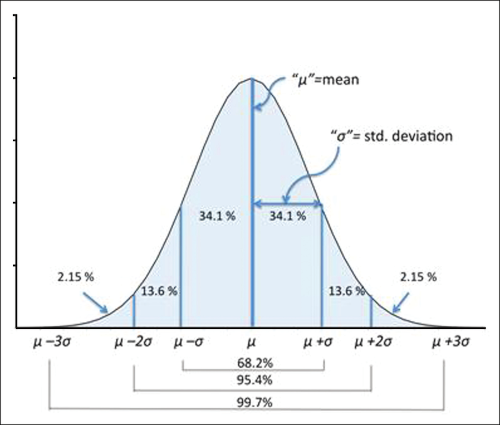

s.a.: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

* +-   sigma = 2 sigma: 68.27%
* +- 2 sigma = 4 sigma: 95.45%
* +- 3 sigma = 6 sigma: 99.73%

Konfidenzintervall und Wahrscheinlichkeit hängen unmittelbar zusammen -- sofern die Verteilung gaußförmig ist.

0.9 %:  3.289707253902945
3.28971 sigma:  0.9000002832201583


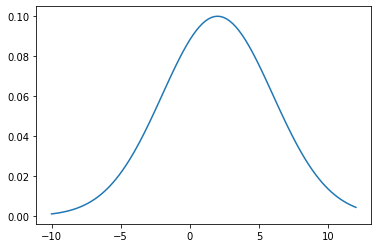

In [5]:
%reset -f

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

myparam = (2,4)

mynorm = scipy.stats.norm(*myparam)

x = np.linspace(-10,12, 100)
mynorm.pdf(2)
plt.plot(x, mynorm.pdf(x))


# def conf2sigma_draft(conf, ew=1,  std=1):
#     #return mynorm.ppf(1-conf/2) - mynorm.ppf(conf/2)
#     return (scipy.stats.norm.ppf(1-conf/2, ew, std) - scipy.stats.norm.ppf(conf/2, ew, std))/std

def conf2sigma(conf):
    """
    Input: confidence intervall (two sided) related to 1 (ie 95% = 0.95 -> 4 (sigma)
    Output: x-interval in units of std
    """
    conf = 1-conf
    return scipy.stats.norm.ppf(1-conf/2) - scipy.stats.norm.ppf(conf/2)

def sigma2conf(sigma):
    """
    Input: x-intervall in units of std (eg 4 (sigma) -> 95.45%)
    Output: confidence intervall related to 1
    """
    return scipy.stats.norm.cdf(sigma/2) - scipy.stats.norm.cdf(-sigma/2)
    
prob, sigm = 0.90, 3.28971
print(prob, '%: ', conf2sigma(prob))
print(sigm, 'sigma: ', sigma2conf(sigm))


In [2]:
# t-distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=t%20student

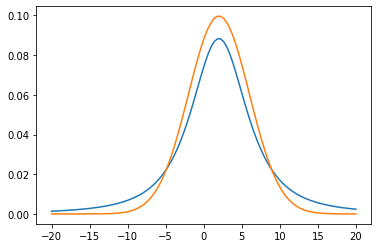

dof:  1000
0.95 %:  3.924678161652815
4 sigma:  0.9542296535067483

dof:  2
0.95 %:  8.60530545982255
4 sigma:  0.816496580927726



In [9]:
%reset -f

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

myparam = (2, 2,4) # dof, mu, sigma
mynorm2 = scipy.stats.t(*myparam)

myparam = (1000, 2,4)
mynorm50= scipy.stats.t(*myparam)

x = np.linspace(-20,20, 100)
plt.plot(x, mynorm2.pdf(x))
plt.plot(x, mynorm50.pdf(x))
plt.show()


def conf2sigma(conf, df):
    conf = 1-conf
    return scipy.stats.t.ppf(1-conf/2, df) - scipy.stats.t.ppf(conf/2, df)

def sigma2conf(sigma, df):
    return scipy.stats.t.cdf(sigma/2, df) - scipy.stats.t.cdf(-sigma/2, df)

prob, sigm, dof = 0.95, 4, 1000
print('dof: ', dof)
print(prob, '%: ', conf2sigma(prob, dof))
print(sigm, 'sigma: ', sigma2conf(sigm, dof))
print()

prob, sigm, dof = 0.95, 4, 2
print('dof: ', dof)
print(prob, '%: ', conf2sigma(prob, dof))
print(sigm, 'sigma: ', sigma2conf(sigm, dof))
print()


Große Werte für den Freiheitsgrad (dof) nähern die t-Verteilung an eine Gaußverteilung an.

Ein kleiner dof-Wert betont die Randbereiche. Um 95% der Werte bei dof=2 zu erfassen, bedarf es 8.6 sigma. Umgekehrt decken 4 sigma lediglich 82% ab.